In [33]:
#Import code from last time
%pylab inline
from part2 import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
print X.shape, y.shape

(3, 2) (3, 1)


In [34]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [5]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [12]:
class NeuralNetwork(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forwardPropagation(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    

In [13]:
NN = NeuralNetwork()

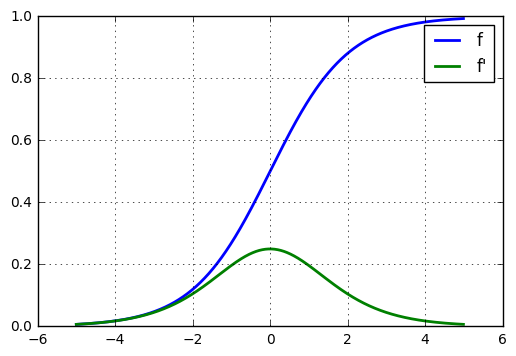

In [14]:
sigTestValues = np.arange(-5,5,0.01)
plot(sigTestValues, NN.sigmoid(sigTestValues), linewidth=2)
plot(sigTestValues, NN.sigmoidPrime(sigTestValues), linewidth=2)
grid(1)
legend(['f', "f'"])

In [20]:
class NeuralNetwork(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forwardPropagation(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
 
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forwardPropagation(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W1 and W2 for a given X and y:
        self.yHat = self.forwardPropagation(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2) 
        
        return dJdW1, dJdW2
        

In [21]:
NN = NeuralNetwork()

In [22]:
cost1 = NN.costFunction(X,y)

In [23]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [24]:
dJdW1

array([[ 0.00787981, -0.02250627, -0.01469934],
       [ 0.00825553, -0.02086955, -0.01443094]])

In [25]:
dJdW2

array([[-0.05650092],
       [-0.03494269],
       [-0.03504471]])

In [27]:
learningRate = 3

In [28]:
NN.W1 = NN.W1 + learningRate*dJdW1
NN.W2 = NN.W2 + learningRate*dJdW2
cost2 = NN.costFunction(X,y)
print cost1, cost2

0.0291606288368 0.0560080156784


In [29]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - learningRate*dJdW1
NN.W2 = NN.W2 - learningRate*dJdW2
cost3 = NN.costFunction(X, y)
print cost2, cost3

0.0560080156784 0.0194385249261
